In [4]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import random, numpy, math
import numpy as np
%matplotlib inline

with open("data1.txt", "r") as f:
    data1 = [np.array([1] + map(int, filter(None, point.split(" ")))) 
            for point in f.read().split("\n") if point]

with open("data2.txt", "r") as f:
    data2 = [np.array([1] + map(int, filter(None, point.split(" ")))) 
            for point in f.read().split("\n") if point]

In [59]:
class VotedPerceptron(object):
    def __init__(self, train_data, T, L=float("inf"), averaged_perceptron=False):
        self.data = train_data
        self.T = T
        self.L = L
        self.averaged_perceptron = averaged_perceptron
        self.train()

    def classify(self, X):
        if self.averaged_perceptron:
            s = 0
            wf = np.zeros(len(X))
            for j in range(len(self.c)):
                wf += self.c[j] * self.w[j]
            return np.sign(wf.dot(X))
    
        s = 0
        for j in range(len(self.c)):
            s += self.c[j] * np.sign( self.w[j].dot(X) )
        return np.sign(s)

    def train(self):
        self.l = 0
        self.c = [0]
        self.w = [numpy.array([0, 0, 0,])]
        T = self.T
        while T != 0:
            # randomly permueate the points.
            random.shuffle(self.data)
            for i in range(len(self.data)):
                X = self.data[i][:-1]
                Y = self.data[i][-1]
                if self.classify(X) != Y:
                    # Pet bhargaya ek ko nikal do.
                    if self.l == self.L:
                        index = np.array(self.c[:-1]).argmin()
                        del self.c[index]
                        del self.w[index]
                        
                    self.w.append(self.w[-1] + Y * X)
                    self.c.append(1)
                    if self.l != self.L:
                        self.l = self.l + 1
                else:
                    self.c[self.l] += 1
            T = T - 1

    def plot_boundary(self):

        print "L is " + str(self.l)

        # Plot the points.
        error = 1
        X1 = []
        X2 = []
        Ys = []
        for i in range(len(self.data)):
            X = self.data[i][:-1]
            Y = self.data[i][-1]
            if self.classify(X) != Y:
                error += 1
            X1.append(X[1])
            X2.append(X[2])
            Ys.append(Y)
        plt.scatter(X1, X2, c=Ys)
        
        print "Error is " + str(100 * error / len(self.data))

        # Print the fucking decision boundary.
        X = np.arange(0, 11, 0.1)
        Y = np.arange(0, 11, 0.1)
        X, Y = np.meshgrid(X, Y)
        Z = np.zeros(X.shape)
        for i in range(110):
            for j in range(110):
                point = [1, X[i][j], Y[i][j]]
                Z[i][j] = self.classify(point)
        plt.contour(X, Y, Z, [0.0], colors='k', linewidths=1, origin='lower')
        plt.show()

L is 283
Error is 18


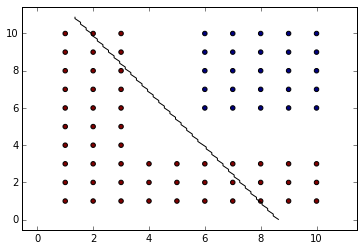

In [60]:
perceptron = VotedPerceptron(data1, T=10, averaged_perceptron=True)
perceptron.plot_boundary()

L is 1673
Error is 13


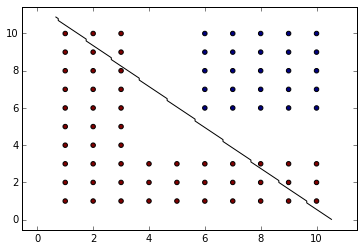

In [61]:
perceptron = VotedPerceptron(data1, T=200, averaged_perceptron=True)
perceptron.plot_boundary()

In [ ]:
perceptron = VotedPerceptron(data1, T=200, averaged_perceptron=True)
perceptron.plot_boundary()

L is 325
Error is 26


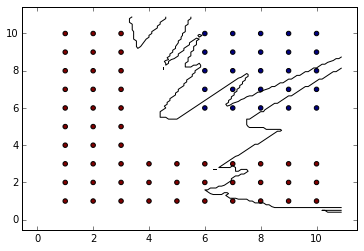

In [56]:
perceptron = VotedPerceptron(data1, T=10)
perceptron.plot_boundary()

L is 1311
Error is 13


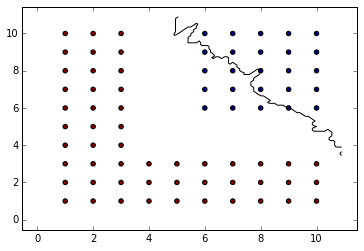

In [42]:
perceptron = VotedPerceptron(data1, T=100)
perceptron.plot_boundary()

L is 150
Error is 26


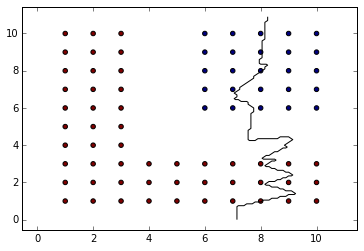

In [62]:
perceptron = VotedPerceptron(data1, T=100, L=150)
perceptron.plot_boundary()

L is 2422
Error is 13


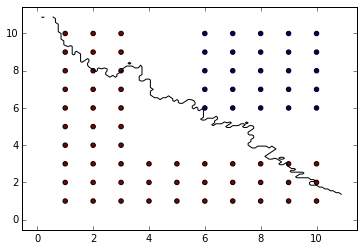

In [41]:
perceptron = VotedPerceptron(data1, T=200)
perceptron.plot_boundary()

L is 200
Error is 9


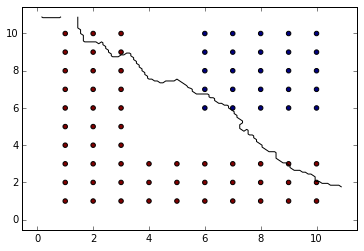

In [44]:
perceptron = VotedPerceptron(data1, T=200, L=200)
perceptron.plot_boundary()